Google Colab - https://colab.research.google.com/drive/1dSWCLDmNYdO_2Gp-k92f342AyIYUgu25


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
medical_df = pd.read_csv("drive/MyDrive/1. ML/Модуль 2/medical-charges.csv")

In [4]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. На мою думку, було б логічно глянути залежності кожного показника та charges. Наприклад, кластеризувати вік людей: молоді, зрілі, дорослі та пенсіонери і роздивитися середнє значення charges.
2. Розглянути чи є різниця між чоловіками та жінками? Чи вони платять однаково у кожному віці?
3. Чи платять, ті що курять, більше від тих що не курять?
4. Можемо поділити людей на категорії: нормальна вага, надмірна, ожиріння, і подивитися, як charges змінюється.
5. Можна спробувати проаналізувати декілька показників одночасно. Наприклад, чи курці з дітьми платять більше, ніж некурці без дітей?

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
!pip install plotly matplotlib seaborn --quiet

In [6]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [7]:
medical_df.sex.describe()

,sex
count,1338
unique,2
top,male
freq,676


In [8]:
fig = px.histogram(medical_df,
                   x='charges',
                   color='sex',
                   marginal='box',
                   nbins=50,
                   title='Розподіл медичних зборів за статтю')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(medical_df,
                   x='charges',
                   color='region',
                   marginal='box',
                   nbins=50,
                   title='Розподіл медичних зборів за регіоном')
fig.update_layout(bargap=0.1)
fig.show()

# Спостереження

1. Медіанне значення серед чоловіків та жінок майже однакове.
2. Максімальні виплати для чоловіків вижче за жінок (не враховуючи викидів)
3. У Southwest у середньому люді платять менше за страхування.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [10]:
fig = px.histogram(medical_df,
                   x='region',
                   color='smoker',
                   barmode='group',
                   title='Розподіл регіонів за статусом курця')
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='children',
                   color='smoker',
                   barmode='group',
                   title='Розподіл кількості дітей за статусом курця')
fig.show()

# Спостереження

У регіоні **southeast** більше курців, ніж в інших — це може впливати на вищі медичні витрати.
Курці частіше не мають дітей або мають 1 дитину — це потенційна соціальна або демографічна особливість.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [11]:
import plotly.express as px

fig = px.violin(medical_df,
                x='children',
                y='charges',
                box=True,         # додаємо бокс-плоти всередині скрипок
                points='all',     # показати всі точки
                title='Звʼязок між медичними зборами та кількістю дітей')
fig.show()


# **Спостереження**
Кількість дітей не має вираженого впливу на рівень медичних зборів. Ймовірно, ключову роль відіграють інші фактори, як-от статус курця чи індекс маси тіла.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [12]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [13]:
def estimate_charges(age, w, b):
    return w * age + b

In [14]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

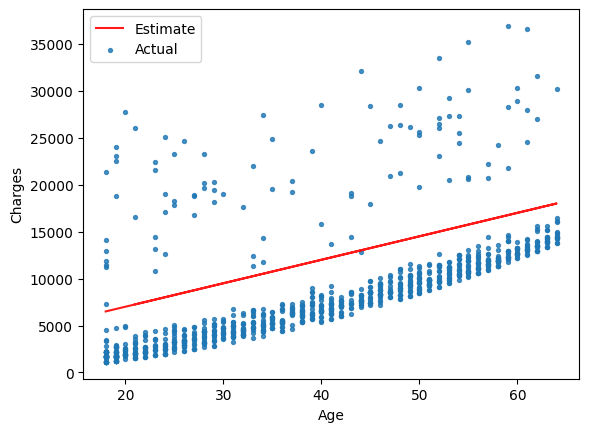

In [15]:
try_parameters(non_smoker_df, w=250, b=2000)

Лінія дуже пласка, недооцінює значення для старших людей. Недостатній нахил.

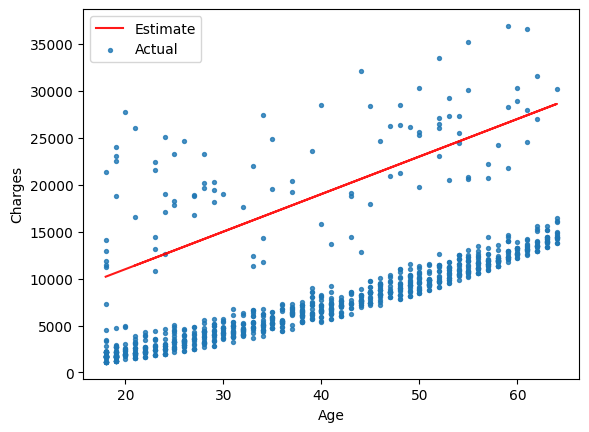

In [16]:
try_parameters(non_smoker_df, w=400, b=3000)

Краще повторює зростання charges з віком, але все ще недооцінює реальні витрати в старшому віці.

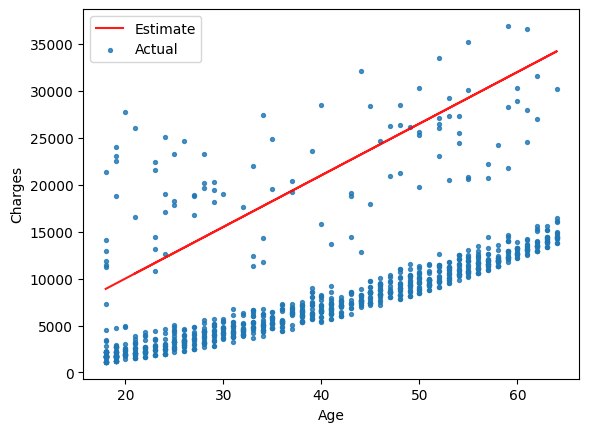

In [17]:
try_parameters(non_smoker_df, w=550, b=-1000)

Лінія досить добре наближається до реальних даних у середньому віці (30–50 років), але переоцінює витрати молодших людей.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [18]:
import numpy as np

def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

In [19]:
def evaluate_parameters(df, w, b):
    ages = df.age
    actual_charges = df.charges
    predicted_charges = estimate_charges(ages, w, b)
    return rmse(actual_charges, predicted_charges)

In [20]:
# Пара 1
rmse1 = evaluate_parameters(non_smoker_df, 250, 2000)
print(f"RMSE (w=250, b=2000): {rmse1:.2f}")

# Пара 2
rmse2 = evaluate_parameters(non_smoker_df, 400, 3000)
print(f"RMSE (w=400, b=3000): {rmse2:.2f}")

# Пара 3
rmse3 = evaluate_parameters(non_smoker_df, 550, -1000)
print(f"RMSE (w=550, b=-1000): {rmse3:.2f}")


RMSE (w=250, b=2000): 5782.74
RMSE (w=400, b=3000): 11477.40
RMSE (w=550, b=-1000): 13678.34


Найменшу похибку має перша пара параметрів w = 250, b = 2000.
Це означає, що з трьох спроб ця лінія найкраще наближається до реальних даних (тобто дає найменше відхилення).
Iнші варіанти дали більшу похибку, отже не варто збільшувати w надто сильно, бо тоді модель переоцінює вплив віку.

In [21]:
import numpy as np

# RMSE функція
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# estimate_charges функція
def estimate_charges(age, w, b):
    return w * age + b

# Змінна з даними
non_smoker_df = medical_df[medical_df.smoker == 'no']
ages = non_smoker_df.age.values
actual_charges = non_smoker_df.charges.values

# Перебір параметрів
best_rmse = float('inf')
best_w = None
best_b = None

for w in range(200, 301, 10):  # Перебір w від 200 до 300 з кроком 10
    for b in range(1000, 3001, 500):  # Перебір b від 1000 до 3000 з кроком 500
        predicted = estimate_charges(ages, w, b)
        current_rmse = rmse(actual_charges, predicted)

        if current_rmse < best_rmse:
            best_rmse = current_rmse
            best_w = w
            best_b = b

print(f"Найкраще значення RMSE: {best_rmse:.2f}")
print(f"Найкраща пара параметрів: w = {best_w}, b = {best_b}")


Найкраще значення RMSE: 4778.20
Найкраща пара параметрів: w = 200, b = 1000


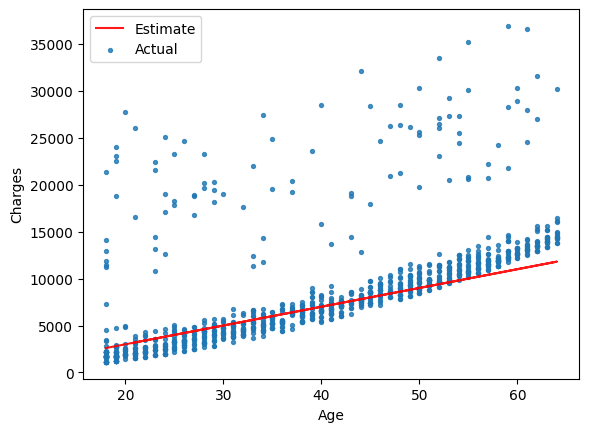

In [22]:
try_parameters(non_smoker_df, w=200, b=-1000)